#Sources:

**week(5):**

https://www.datacamp.com/community/tutorials/deep-learning-python?utm_source=adwords_ppc#

https://stackoverflow.com/questions/50125844/how-to-standard-scale-a-3d-matrix/50134698

https://keras.io/guides/sequential_model/

https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras

https://note.nkmk.me/en/python-numpy-reshape-usage/

https://debuggercafe.com/adam-algorithm-for-deep-learning-optimization/

**week(6):**

https://www.tensorflow.org/tutorials/images/data_augmentation

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/

https://www.machinecurve.com/index.php/2020/02/05/how-to-use-cropping-layers-with-keras/

https://gist.github.com/rstml/bbd491287efc24133b90d4f7f3663905

**week(7):**

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

https://keras.io/guides/sequential_model/

https://www.programiz.com/python-programming/function-argument

https://www.sciencedirect.com/topics/mathematics/convolutional-neural-networks

https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529

https://www.tensorflow.org/tutorials/images/cnn


# Libraries Loading -  Randomness

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as layers

import tensorflow.keras as keras
from sklearn.preprocessing import StandardScaler

#'''
# Assure Reproducibility
from tensorflow import random
np.random.seed(1337)
random.set_seed(1337)
#'''
import random

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Cropping2D, Flatten, Dense

#Functions

In [2]:
def scaling_data_to_0_1(x_train, x_test, normalize_factor, shapeFlag):
  # Scale images to the [0, 1] range
  x_train = x_train.astype("float32") / normalize_factor
  x_test = x_test.astype("float32") / normalize_factor
  
  if shapeFlag:
    # Make sure images have the right shape e.g.(28, 28, 1)
    x_train = np.expand_dims(x_train, -1) 
    x_test = np.expand_dims(x_test, -1)
  
  return x_train, x_test


def targetVar_categoricalEncoding(y_train, y_test, num_classes):
  # convert class vectors to "binary" class matrices (one-hot)
  y_train = tf.keras.utils.to_categorical(y_train, num_classes)
  y_test = tf.keras.utils.to_categorical(y_test, num_classes)
  return y_train, y_test


def print_info_train_test(x_train, x_test, y_train, y_test, s):
  print(s)
  print("x_train shape: ", x_train.shape)
  print("train samples: ", x_train.shape[0]); print("test samples: ",x_test.shape[0])
  print('y_train: ', y_train.shape); print('y_test: ', y_test.shape)


def show_random_images(numImages, dataset, rows, cols, channels):

  for i in range(numImages):
    rand_index = np.random.choice(dataset.shape[0])
    rand_img = dataset[rand_index]
    plt.figure()
    if channels == -1:
      plt.imshow(rand_img.reshape(rows, cols))
    else:
      plt.imshow(rand_img.reshape(rows, cols,channels))


def model_summary_plot(model, plotModelFlag):
  model.summary()
  if plotModelFlag:
    tf.keras.utils.plot_model(model)


def plot_accuracy_loss(history):

  plt.plot(history.history['val_accuracy'], label='validation')
  plt.plot(history.history['accuracy'], label='train')
  plt.title('Accuracy'); plt.legend()
  plt.show(); plt.clf()

  plt.plot(history.history['val_loss'], label='validation')
  plt.plot(history.history['loss'], label='train')
  plt.title('Loss'); plt.legend()
  plt.show(); plt.clf()


def standarizing_data(x_train, x_test, intToFloatFlag):
  '''
  Only the training set will be used to calculate standarization's coefficients.
  However, standarization will be applied both to training and testing data.
  '''
  scaler = StandardScaler().fit(x_train.reshape(-1, x_train.shape[-1]))
  
  # Standarizing - scaling the training set
  x_train_standard = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
  # Standarizing - scaling the testing set
  x_test_standard = scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)

  if intToFloatFlag:
    x_train_standard_float = x_train_standard.astype('float32')
    x_test_standard_float = x_test_standard.astype('float32')
    return x_train_standard_float, x_test_standard_float

  return x_train_standard, x_test_standard  


def adding_simple_inputLayer(model, input_shape, flattenFlag, input_output_units, input_output_AFs):
  if flattenFlag:
    model.add(layers.Flatten(input_shape = input_shape ))# from 28x28x1 => 784x1
  else:
    model.add(layers.Dense(input_output_units[0], activation=input_output_AFs[0], input_shape = input_shape))
  return model


def adding_randCrop_inputLayer(model, input_shape, flattenFlag):
  #model.add(layers.RandomCrop( height=26, width=26, seed=None) )
  #(top_crop, bottom_crop), (left_crop, right_crop)
  top_crop, bottom_crop, left_crop, right_crop = input_shape[1], input_shape[1], input_shape[0], input_shape[0]
  while top_crop + bottom_crop>=input_shape[1]:
    top_crop, bottom_crop= random.randint(0, int(input_shape[1])), random.randint(0, int(input_shape[1]))
    print(top_crop, bottom_crop)
  while left_crop + right_crop>=input_shape[0]:
    left_crop, right_crop= random.randint(0, int(input_shape[0])), random.randint(0, int(input_shape[0]))
    print(left_crop, right_crop)
  model.add(Cropping2D(cropping=((top_crop, bottom_crop), (left_crop, right_crop)), input_shape=input_shape))
  if flattenFlag:
    model.add(Flatten())
  return model


def adding_conv2D_inputLayers(model, input_shape, input_output_units, input_output_AFs, poolSize, stridesNum, conv_units, conv_AFs, maxPool_flagList):

  model.add(layers.Conv2D(filters=input_shape[0], kernel_size=input_shape[2], activation=input_output_AFs[0], input_shape=input_shape)) # Learn 2D Representations
  model.add(layers.MaxPool2D(pool_size=poolSize, strides=stridesNum)) # Still learning 2D Representations

  for i in range(len(conv_AFs)):
    model.add(layers.Conv2D(conv_units[i], input_shape[2], activation=conv_AFs[i])) # Learn 2D Representations
    #print(model.output_shape)
    if maxPool_flagList[i]:
      model.add(layers.MaxPool2D(pool_size=poolSize, strides=stridesNum)) # Still learning 2D Representations

  if flattenFlag:
    model.add(Flatten())
  return model


def adding_hiddenLayers_outputLayer(model, input_output_units, input_output_AFs, hiddenLayers_units, hiddenLayers_AFs, kernelRegs = [], p=-2, dr_ba_layers = []):
  # Addind hidden layers

  if kernelRegs:
    for i in range(len(hiddenLayers_AFs)):
      model.add(layers.Dense(hiddenLayers_units[i], activation=hiddenLayers_AFs[i], kernel_regularizer=kernelRegs[i]))
  
  elif p!=-1 and p!=-2: #DropOut
    for i in range(len(hiddenLayers_AFs)):
      model.add(layers.Dense(hiddenLayers_units[i], activation=hiddenLayers_AFs[i]))
      if dr_ba_layers[i]:
        model.add(layers.Dropout(p))
  elif p==-1: #BatchNorm
    for i in range(len(hiddenLayers_AFs)):
      model.add(layers.Dense(hiddenLayers_units[i], activation=hiddenLayers_AFs[i]))
      if dr_ba_layers[i]:
        model.add(layers.BatchNormalization())
  else:
     for i in range(len(hiddenLayers_AFs)):
       model.add(layers.Dense(hiddenLayers_units[i], activation=hiddenLayers_AFs[i]))
     # Adding output layer
  
  model.add(layers.Dense(input_output_units[1], activation=input_output_AFs[1]))
  return model


def buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units,  hiddenLayers_units, flattenFlag, randCropFlag=False, convFlag=False, poolSize=-1, stridesNum=-1, conv_units = [], conv_AFs = [], maxPool_flagList = []):
  # Initialize the constructor
  model = tf.keras.Sequential()
  if randCropFlag:
    model = adding_randCrop_inputLayer(model, input_shape, flattenFlag)
  elif convFlag:
    model = adding_conv2D_inputLayers(model, input_shape, input_output_units, input_output_AFs, poolSize, stridesNum, conv_units, conv_AFs, maxPool_flagList)
  else:
    model = adding_simple_inputLayer(model, input_shape, flattenFlag, input_output_units, input_output_AFs)

  # Addind hidden layers and output layer
  model = adding_hiddenLayers_outputLayer(model, input_output_units, input_output_AFs, hiddenLayers_units, hiddenLayers_AFs)  
  return model


def buildModel_regL1L2(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units,  hiddenLayers_units, flattenFlag, l1_coef, l2_coef, kernelRegs, convFlag=False, poolSize=-1, stridesNum=-1, conv_units = [], conv_AFs = [], maxPool_flagList = []):
  # Initialize the constructor
  model = tf.keras.Sequential()
  
  # Regularizer object
  reg = keras.regularizers.l1_l2(l1=l1_coef, l2=l2_coef)  
  kernelRegs.insert(0,reg)

  # Adding input layer
  if convFlag:
    model = adding_conv2D_inputLayers(model, input_shape, input_output_units, input_output_AFs, poolSize, stridesNum, conv_units, conv_AFs, maxPool_flagList)
  else:
    model = adding_simple_inputLayer(model, input_shape, flattenFlag, input_output_units, input_output_AFs) 
  
  # Addind hidden layers and output layer
  model = adding_hiddenLayers_outputLayer(model, input_output_units, input_output_AFs, hiddenLayers_units, hiddenLayers_AFs, kernelRegs = kernelRegs, p=-2, dr_ba_layers = [])
  return model


def buildModel_dropOut_or_batchNorm(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units,  hiddenLayers_units, flattenFlag, p, dr_ba_layers, convFlag=False, poolSize=-1, stridesNum=-1, conv_units = [], conv_AFs = [], maxPool_flagList = []):
  # Initialize the constructor
  model = tf.keras.Sequential()

  # Adding input layer
  if convFlag:
    model = adding_conv2D_inputLayers(model, input_shape, input_output_units, input_output_AFs, poolSize, stridesNum, conv_units, conv_AFs, maxPool_flagList)
  else:
    model = adding_simple_inputLayer(model, input_shape, flattenFlag, input_output_units, input_output_AFs)  
  
  # Addind hidden layers and output layer
  model = adding_hiddenLayers_outputLayer(model, input_output_units, input_output_AFs, hiddenLayers_units, hiddenLayers_AFs, kernelRegs = [], p=p, dr_ba_layers = dr_ba_layers)
  return model


def trainModel(model, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train, y_train, augFlag = False):
  model.compile(loss = loss_fun, optimizer = opt, metrics = metrics )
  if augFlag:
    # define data preparation
    datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
    # fit parameters from data
    datagen.fit(x_train)
    model_history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), validation_data=(x_test, y_test), steps_per_epoch=len(x_test)//batch_size, epochs=epochs)
  else:
    model_history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = valSplit)
  return model, model_history


def evalModel(model, x_test, y_test, verb):
  # Model Evaluating
  score = model.evaluate(x_test, y_test, verbose = verb)
  print("\nTest loss:", score[0]); print("\nTest accuracy:", score[1])


# Ερώτημα 1: Data Loading - Standarization


170508288/170498071 [==============================] - 8s 0us/step
Initial dataset cfar10
x_train shape:  (50000, 32, 32, 3)
train samples:  50000
test samples:  10000
y_train:  (50000, 1)
y_test:  (10000, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Standarized dataset cfar10
x_train shape:  (50000, 32, 32, 3)
train samples:  50000
test samples:  10000
y_train:  (50000, 10)
y_test:  (10000, 10)


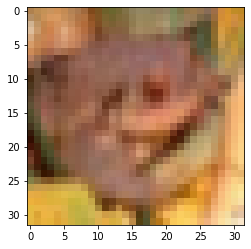

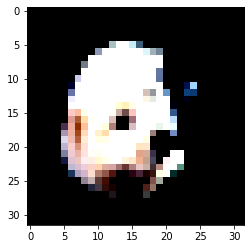

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)
normalize_factor = 255
shapeFlag=False
intToFloatFlag=True

s="Initial dataset cfar10"
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
#print_info_train_test(x_train, x_test, y_train, y_test, s)

# Scaling images to the [0, 1] range and making sure images have shape (32, 32, 3)
x_train, x_test = scaling_data_to_0_1(x_train, x_test, normalize_factor, shapeFlag)
print_info_train_test(x_train, x_test, y_train, y_test, s)

# convert class vectors to "binary" class matrices (one-hot)
y_train, y_test = targetVar_categoricalEncoding(y_train,y_test,num_classes)
#print_info_train_test(x_train, x_test, y_train, y_test,s)

# show a random image
numImages=1
show_random_images(numImages, x_train, input_shape[0], input_shape[1], input_shape[2])

#Standarization
s="Standarized dataset cfar10"
# Standarization - Transforming the data (images) to  ~N(0,1)
x_train_standard, x_test_standard = standarizing_data(x_train, x_test, intToFloatFlag)
print_info_train_test(x_train_standard, x_test_standard, y_train, y_test, s)

# show a random image
numImages=1
show_random_images(numImages, x_train_standard, input_shape[0], input_shape[1], input_shape[2])

#Ερώτημα 1: Model Building - Training - Evaluating - Presentation

15 9
11 20
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cropping2d (Cropping2D)     (None, 8, 1, 3)           0         
                                                                 
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 128)               3200      
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4,490
Trainable params: 4,490
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:201: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
78/78 [==============================] - 2s 15ms/step - loss: 2.2364 - accuracy: 0.1631 - val_loss: 2.2651 - val_accuracy: 0.1432
Epoch 2/100
78/78 [==============================] - 1s 12ms/step - loss: 2.1291 - accuracy: 0.2114 - val_loss: 2.2526 - val_accuracy: 0.1387
Epoch 3/100
78/78 [==============================] - 1s 15ms/step - loss: 2.1014 - accuracy: 0.2234 - val_loss: 2.2446 - val_accuracy: 0.1269
Epoch 4/100
78/78 [==============================] - 1s 12ms/step - loss: 2.0806 - accuracy: 0.2326 - val_loss: 2.2370 - val_accuracy: 0.1472
Epoch 5/100
78/78 [==============================] - 1s 11ms/step - loss: 2.0798 - accuracy: 0.2313 - val_loss: 2.2317 - val_accuracy: 0.1505
Epoch 6/100
78/78 [==============================] - 1s 12ms/step - loss: 2.0790 - accuracy: 0.2320 - val_loss: 2.2375 - val_accuracy: 0.1292
Epoch 7/100
78/78 [==============================] - 1s 12ms/step - loss: 2.0631 - accuracy: 0.2415 - val_loss: 2.2364 - val_accuracy: 0.1292
Epoch 

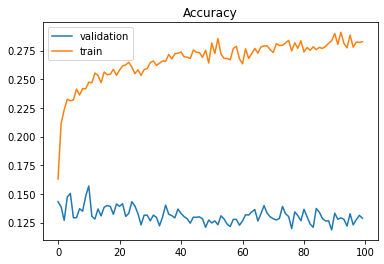

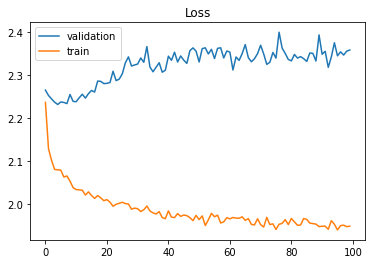

<Figure size 432x288 with 0 Axes>

In [4]:
# Model Building
input_output_AFs = ["","softmax"]
input_output_units = [-1, num_classes] 


hiddenLayers_AFs = ["relu"]; hiddenLayers_units =[128]
#hiddenLayers_AFs = ["relu","relu","relu"]; hiddenLayers_units =[256,256,256]
#hiddenLayers_AFs = ["relu","relu","relu","relu"]; hiddenLayers_units =[256,256,256,256]

plotModelFlag=True
flattenFlag=True
augFlag= True

standarDataModel = buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag, augFlag)
model_summary_plot(standarDataModel, plotModelFlag)

# Model Training
#epochs, batch_size, valSplit = 5, 128, 0.1
#epochs, batch_size, valSplit = 20, 128, 0.1
#epochs, batch_size, valSplit = 50, 128, 0.1
epochs, batch_size, valSplit = 100, 128, 0.1

loss_fun = "categorical_crossentropy"

#'''
#adam model
opt = "adam"
#'''
'''
#sgd_momentum model
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.1)
#'''
metrics = ["accuracy"]

standarDataModel_opt, standarDataModel_opt_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train, augFlag)

# Model Evaluating
verb=0
evalModel(standarDataModel_opt, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_opt_history)


**Σχολιασμός Ερωτήματος 1:**

Ερώτημα 1 - μοντέλο 'adam' :

Test loss: 1.94735586643219

Test accuracy: 0.2782000005245209

Τo μοντέλo NN που διαμορφώθηκε διαθέτει ένα hidden layer, με A.F. στο hidden layer την ReLU, αριθμό κόμβων-νευρώνων 128. Στο output layer η A.F. είναι ο softMax.  

Οι εποχές εκπαίδευσης αριθμούν σε 100, το batch size σε 128, το ποσοστό με το οποίο πραγματοποιείται το splitting στο training phase (ώστε να προκύψουν τα σχετικά testing-validation sets) 0.1 και η loss function categorical_crossentropy.

Αξιοποιείται η τεχνική data augmentation με παραμέτρους horizontal_flip=True και vertical_flip=True

Η απόδοση του NN όπως εύκολα διαπιστώνεται είναι πολύ κακή, και όπως φαίνεται, παρά το πλήθος των εποχών, το μοντέλο δεν έχει κάνει overfitting.

Δεν αυξάνεται το πλήθος των επιπέδων -hidden layers- του μοντέλου ώστε να είναι εφικτή η σύγκριση με μετέπειτα μοντέλα τα οποία πρόκειται να δημιουργηθούν. 

# Ερώτημα 2


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:201: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
78/78 [==============================] - 32s 405ms/step - loss: 2.0325 - accuracy: 0.2349 - val_loss: 2.0989 - val_accuracy: 0.2198
Epoch 2/100
78/78 [==============================] - 31s 400ms/step - loss: 1.7788 - accuracy: 0.3431 - val_loss: 2.1710 - val_accuracy: 0.1764
Epoch 3/100
78/78 [==============================] - 31s 400ms/step - loss: 1.6510 - accuracy: 0.3961 - val_loss: 2.2948 - val_accuracy: 0.1943
Epoch 4/100
78/78 [==============================] - 31s 402ms/step - loss: 1.5372 - accuracy: 0.4337 - val_loss: 2.3820 - val_accuracy: 0.2324
Epoch 5/100
78/78 [==============================] - 31s 402ms/step - loss: 1.4836 - accuracy: 0.4576 - val_loss: 2.5494 - val_accuracy: 0.1908
Epoch 6/100
78/78 [==============================] - 31s 400ms/step - loss: 1.4310 - accuracy: 0.4793 - val_loss: 2.4015 - val_accuracy: 0.1800
Epoch 7/100
78/78 [==============================] - 33s 427ms/step - loss: 1.3769 - accuracy: 0.4993 - val_loss: 2.8442 - val_accuracy:

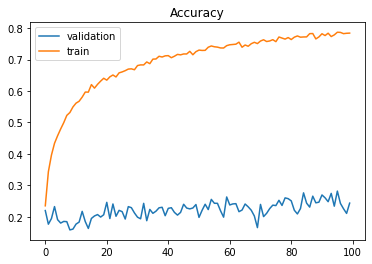

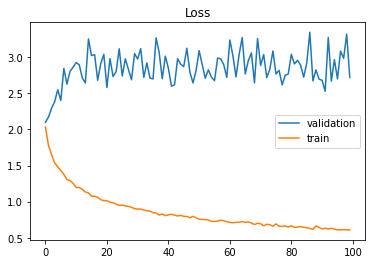

<Figure size 432x288 with 0 Axes>

In [5]:
# Model Building
input_output_AFs = ["relu","softmax"]
input_output_units = [-1, num_classes] 

hiddenLayers_AFs = ["relu"]; hiddenLayers_units =[64]
#hiddenLayers_AFs = ["relu","relu","relu"]; hiddenLayers_units =[64,128, 128]
#hiddenLayers_AFs = ["relu","relu","relu"]; hiddenLayers_units =[256,256,256]
#hiddenLayers_AFs = ["relu","relu","relu","relu"]; hiddenLayers_units =[256,256,256,256]

conv_AFs = ["relu","relu","relu","relu"];conv_units = [64, 64, 64, 64]; maxPool_flagList = [0,0,0,0]
#conv_AFs = ["relu","relu"];conv_units = [64, 64]; maxPool_flagList = [1,0]

plotModelFlag=True
flattenFlag=True
augFlag, randCropFlag = True, False
convFlag, poolSize, stridesNum = True, 2,2

standarDataModel = buildModel(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units, hiddenLayers_units, flattenFlag, randCropFlag,convFlag, poolSize, stridesNum, conv_units, conv_AFs, maxPool_flagList)
model_summary_plot(standarDataModel, plotModelFlag)

# Model Training
#epochs, batch_size, valSplit = 5, 128, 0.1
#epochs, batch_size, valSplit = 20, 128, 0.1
#epochs, batch_size, valSplit = 50, 128, 0.1
epochs, batch_size, valSplit = 100, 128, 0.1
loss_fun = "categorical_crossentropy"
#loss_fun = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#'''
#adam model
opt = "adam"
#'''
'''
#sgd_momentum model
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.1)
#'''
metrics = ["accuracy"]

standarDataModel_opt, standarDataModel_opt_history = trainModel(standarDataModel, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train, augFlag)

# Model Evaluating
verb=0
evalModel(standarDataModel_opt, x_test_standard, y_test, verb)

# Model presentation
plot_accuracy_loss(standarDataModel_opt_history)

**Σχολιασμός Ερωτήματος 2:**

Ερώτημα 2 - μοντέλο 'adam' :

Test loss: 0.7708665728569031

Test accuracy: 0.734000027179718

Τo μοντέλo NN που διαμορφώθηκε είναι καθ'όλα όμοιο με το προηγούμενο, με τη διαφορά πως διαθέτει 5 Conv2D layers  πριν από το Dense layer.

Παρατηρείται πως η ακρίβεια του μοντέλου βελτιώθηκε σημαντικά. Tο μοντέλο, μάλλον, δεν είναι ακόμα overfitted.



# Ερώτημα 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:201: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
78/78 [==============================] - 33s 410ms/step - loss: 7.0729 - accuracy: 0.1941 - val_loss: 2.6825 - val_accuracy: 0.1141
Epoch 2/100
78/78 [==============================] - 38s 482ms/step - loss: 2.2240 - accuracy: 0.2696 - val_loss: 2.5325 - val_accuracy: 0.1478
Epoch 3/100
78/78 [==============================] - 38s 492ms/step - loss: 2.0867 - accuracy: 0.3211 - val_loss: 2.7083 - val_accuracy: 0.1173
Epoch 4/100
78/78 [==============================] - 38s 493ms/step - loss: 1.9823 - accuracy: 0.3522 - val_loss: 2.5833 - val_accuracy: 0.1882
Epoch 5/100
78/78 [==============================] - 38s 491ms/step - loss: 1.9222 - accuracy: 0.3875 - val_loss: 2.8419 - val_accuracy: 0.1929
Epoch 6/100
78/78 [==============================] - 38s 488ms/step - loss: 1.8882 - accuracy: 0.4007 - val_loss: 2.7808 - val_accuracy: 0.1730
Epoch 7/100
78/78 [==============================] - 37s 480ms/step - loss: 1.8417 - accuracy: 0.4092 - val_loss: 2.8414 - val_accuracy:

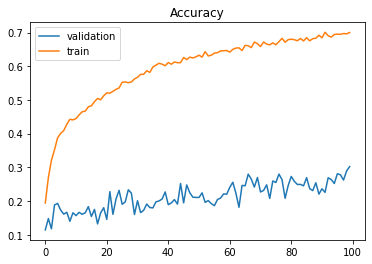

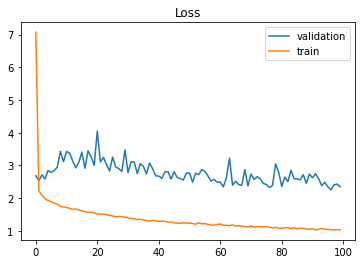

Epoch 1/100
78/78 [==============================] - 37s 468ms/step - loss: 2.0549 - accuracy: 0.2319 - val_loss: 2.1468 - val_accuracy: 0.1968
Epoch 2/100
78/78 [==============================] - 35s 446ms/step - loss: 1.8183 - accuracy: 0.3263 - val_loss: 2.2178 - val_accuracy: 0.1636
Epoch 3/100
78/78 [==============================] - 35s 446ms/step - loss: 1.6934 - accuracy: 0.3664 - val_loss: 2.1874 - val_accuracy: 0.1928
Epoch 4/100
78/78 [==============================] - 35s 449ms/step - loss: 1.6048 - accuracy: 0.4040 - val_loss: 2.2912 - val_accuracy: 0.2031
Epoch 5/100
78/78 [==============================] - 35s 452ms/step - loss: 1.5650 - accuracy: 0.4204 - val_loss: 2.4950 - val_accuracy: 0.1912
Epoch 6/100
78/78 [==============================] - 35s 450ms/step - loss: 1.5030 - accuracy: 0.4492 - val_loss: 2.5457 - val_accuracy: 0.1838
Epoch 7/100
78/78 [==============================] - 35s 450ms/step - loss: 1.4684 - accuracy: 0.4650 - val_loss: 2.4929 - val_accuracy:

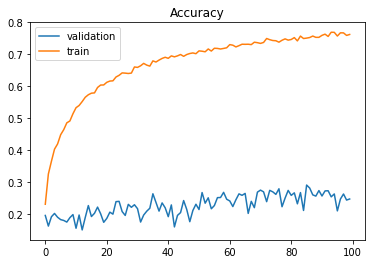

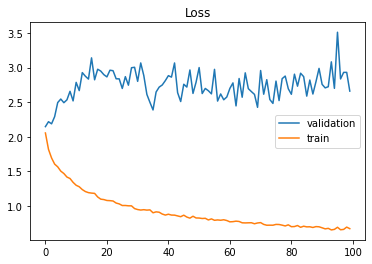

Epoch 1/100
78/78 [==============================] - 33s 408ms/step - loss: 1.9335 - accuracy: 0.2845 - val_loss: 2.1722 - val_accuracy: 0.1688
Epoch 2/100
78/78 [==============================] - 37s 469ms/step - loss: 1.6313 - accuracy: 0.4020 - val_loss: 2.3313 - val_accuracy: 0.1935
Epoch 3/100
78/78 [==============================] - 37s 469ms/step - loss: 1.4921 - accuracy: 0.4602 - val_loss: 2.6160 - val_accuracy: 0.1763
Epoch 4/100
78/78 [==============================] - 36s 468ms/step - loss: 1.4122 - accuracy: 0.4864 - val_loss: 2.6738 - val_accuracy: 0.2045
Epoch 5/100
78/78 [==============================] - 36s 467ms/step - loss: 1.3312 - accuracy: 0.5225 - val_loss: 2.9168 - val_accuracy: 0.1855
Epoch 6/100
78/78 [==============================] - 36s 467ms/step - loss: 1.2722 - accuracy: 0.5389 - val_loss: 3.0141 - val_accuracy: 0.1597
Epoch 7/100
78/78 [==============================] - 36s 466ms/step - loss: 1.2455 - accuracy: 0.5549 - val_loss: 3.1273 - val_accuracy:

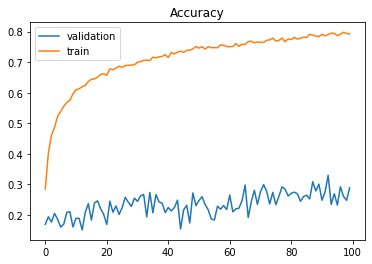

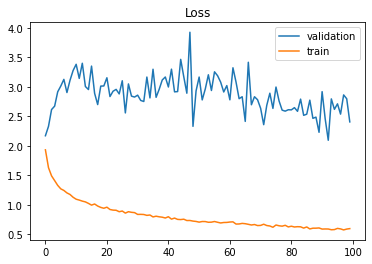

<Figure size 432x288 with 0 Axes>

In [6]:
# Model Building parameters
input_output_AFs = ["relu","softmax"]
input_output_units = [-1, num_classes]

#hiddenLayers_AFs = ["relu","relu","relu","relu"]; hiddenLayers_units =[256,256,256,256]
hiddenLayers_AFs = ["relu"]; hiddenLayers_units =[64]

conv_AFs = ["relu","relu","relu","relu"];conv_units = [64, 64, 64, 64]; maxPool_flagList = [0,0,0,0]

plotModelFlag=True
flattenFlag=True
augFlag, randCropFlag = True, False
convFlag, poolSize, stridesNum = True, 2,2

# Model Training parameters
#epochs, batch_size, valSplit = 5, 128, 0.1
#epochs, batch_size, valSplit = 20, 128, 0.1
#epochs, batch_size, valSplit = 50, 128, 0.1
epochs, batch_size, valSplit = 100, 128, 0.1
loss_fun = "categorical_crossentropy"

#'''
#adam model
opt = "adam"
#'''
'''
#sgd_momentum model
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.1)
'''
metrics = ["accuracy"]

#'''
# L2 Regularization
# Building
l1_coef, l2_coef, kernelRegs = 0.005, 0.005, ['l2','l2','l2']
standarDataModel_L2 = buildModel_regL1L2(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units,  hiddenLayers_units, flattenFlag, l1_coef, l2_coef, kernelRegs, convFlag, poolSize, stridesNum, conv_units, conv_AFs, maxPool_flagList)
# Training
standarDataModel_L2, standarDataModel_L2_history = trainModel(standarDataModel_L2, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train, augFlag)
# Evaluating
verb=0
evalModel(standarDataModel_L2, x_test_standard, y_test, verb)
# Presentation
plot_accuracy_loss(standarDataModel_L2_history)


# Dropout
# Building
p=0.1
dropOutLayers=[1,1,1,1]
standarDataModel_dropOut = buildModel_dropOut_or_batchNorm(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units,  hiddenLayers_units, flattenFlag, p, dropOutLayers, convFlag, poolSize, stridesNum, conv_units, conv_AFs, maxPool_flagList)
# Training
standarDataModel_dropOut, standarDataModel_dropOut_history = trainModel(standarDataModel_dropOut, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train, augFlag)
# Evaluating
verb=0
evalModel(standarDataModel_dropOut, x_test_standard, y_test, verb)
# Presentation
plot_accuracy_loss(standarDataModel_dropOut_history)

#'''
# Batchnorm
# Building
p=-1
batcNormLayers=[1,1,1,1]
standarDataModel_batchNorm =  buildModel_dropOut_or_batchNorm(input_shape, input_output_AFs, hiddenLayers_AFs, input_output_units,  hiddenLayers_units, flattenFlag, p, batcNormLayers, convFlag, poolSize, stridesNum, conv_units, conv_AFs, maxPool_flagList)
# Training
standarDataModel_batchNorm, standarDataModel_batchNorm_history = trainModel(standarDataModel_batchNorm, loss_fun, opt, metrics, batch_size, epochs, valSplit, x_train_standard, y_train, augFlag)
# Evaluating
verb=0
evalModel(standarDataModel_batchNorm, x_test_standard, y_test, verb)
# Presentation
plot_accuracy_loss(standarDataModel_batchNorm_history)
#'''


**Σχολιασμός Ερωτήματος 3:**


Ερώτημα 2 - μοντέλο 'adam' :

Test loss: 0.7708665728569031

Test accuracy: 0.734000027179718


Ερώτημα 3 - μοντέλο  'adam, L1L2 - Regularization':

Test loss: 1.071655511856079

Test accuracy: 0.6873000264167786


Ερώτημα 3 - μοντέλο  'adam, Dropout - Regularization':


Test loss: 0.8193767666816711

Test accuracy: 0.7152000069618225


Ερώτημα 3 - μοντέλο  'adam,  Batchnorm - Regularization':

Test loss: 0.8242262005805969

Test accuracy: 0.7207000255584717


Τα μοντέλα NNs που διαμορφώθηκαν είναι καθ'όλα όμοια με του προηγούμενου ερωτήματος, με τη διαφορά πως εφαρμόζεται διαφορετικού τύπου regularization κάθε φορά.

Παρατηρείται ότι τα μοντέλα του 3ου ερωτήματος δεν επιτυγχάνουν μεγαλύτερο accuracy και μικρότερες (τελικές) τιμές στο loss function συγκριτικά με το μοντέλο του 2ου. Ανάμεσα στα τρία μοντέλα του 3ου ερωτήματος αποδοτικότερα με δεδομένη την τιμή της accuracy (μεγαλύτερη) και της loss function (μικρότερη) κρίνονται τα 2 και 3.

Παρατηρώντας τα διαγράμματα, θα μπορούσε κανείς να συμπεράνει πως ακόμη εμφανίζεται σε κάποιο overfitting. Συγκεκριμένα, το accuracy του training set από αυξάνει σταθερά, με την καμπύλη του να βρίσκεται "πάνω" από εκείνη του accuracy του validation set. Αντίστοιχα, η τιμή της loss function του training set από μειώνεται σταθερά, με την καμπύλη της να βρίσκεται "κάτω" από εκείνη της loss function του validation set.